# Netflix Userbase Analysis

**Objective**: Leverage linear regression to predict Monthly Revenue and logistic regression to classify customers based on a positive or negative feedback proxy, using the Netflix Userbase dataset. This task will encompass data preprocessing, exploratory data analysis (EDA), model building, evaluation, and visualization.

**Submitted by**: Neil Ivan S. Orencia

In [ ]:
# Importing necessary libraries for regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, explained_variance_score, r2_score

## Part 1: Data Preprocessing

### Load the Dataset

Import the dataset using Pandas and display its structure.

In [ ]:
# Loading the dataset called "onlinefoods.csv"
df = pd.read_csv('Netflix_Userbase.csv')

# Displaying the first few rows of the dataset
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


### Missing Values

Identify and manage any missing values appropriately.

In [ ]:
# Checking for missing values in the dataset
df.isnull().sum()
# There are no missing values as shown in the results

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

### Encode Categorical Variables

Transform categorical variables into numerical representations suitable for regression analysis.

In [ ]:
# Performing one-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Subscription Type', 'Country', 'Gender', 'Device', 'Plan Duration'])

# Displaying the first few rows of the one hot encoded dataset
df.head()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Country_Australia,Country_Brazil,...,Country_Spain,Country_United Kingdom,Country_United States,Gender_Female,Gender_Male,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet,Plan Duration_1 Month
0,1,10,15-01-22,10-06-23,28,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
1,2,15,05-09-21,22-06-23,35,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,3,12,28-02-23,27-06-23,42,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
3,4,12,10-07-22,26-06-23,51,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
4,5,10,01-05-23,28-06-23,33,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


### Feature Selection

Decide which features to include in the regression models. Explain your choice.

In [ ]:
# Selecting features for linear regression (predicting Monthly Revenue)
linear_features = [
    'Age',
    'Subscription Type_Basic',
    'Subscription Type_Premium',
    'Subscription Type_Standard',
    'Country_Australia',
    'Country_Brazil',
    'Country_Spain',
    'Country_United Kingdom',
    'Country_United States',
    'Gender_Female',
    'Gender_Male',
    'Device_Laptop',
    'Device_Smart TV',
    'Device_Smartphone',
    'Device_Tablet',
    'Plan Duration_1 Month'
]

# Selecting features for logistic regression (predicting Customer Feedback)
logistic_features = [
    'Age',
    'Subscription Type_Basic',
    'Subscription Type_Premium',
    'Subscription Type_Standard',
    'Country_Australia',
    'Country_Brazil',
    'Country_Spain',
    'Country_United Kingdom',
    'Country_United States',
    'Gender_Female',
    'Gender_Male',
    'Device_Laptop',
    'Device_Smart TV',
    'Device_Smartphone',
    'Device_Tablet',
    'Plan Duration_1 Month'
]

<u>**Linear Model Features Justification (Predicting Monthly Revenue):**</u>

1. **Age**: Age is a crucial factor in predicting Monthly Revenue as different age groups may have varying subscription preferences and spending habits.

2. **Subscription Type**: Including different subscription types (Basic, Premium, Standard) helps capture how pricing tiers affect revenue generation.

3. **Country**: Country-specific economic factors and market conditions can significantly impact Monthly Revenue.

4. **Gender**: Gender may influence subscription choices and usage patterns.

5. **Device**: The type of device (e.g., Laptop, Smart TV, Smartphone) used by customers can affect their subscription behavior and revenue contribution.

6. **Plan Duration**: The duration of subscription plans (e.g., 1 Month) can impact revenue streams, especially in understanding short-term versus long-term revenue patterns.

<u>**Logistic Model Features Justification (Predicting Customer Feedback):**</u>

1. **Age**: Age can influence feedback patterns, such as satisfaction levels and engagement with the subscription service.

2. **Subscription Type**: Different subscription plans may lead to varying levels of customer satisfaction and feedback.

3. **Country**: Cultural differences and regional preferences can impact how customers perceive and provide feedback.

4. **Gender**: Gender may play a role in feedback sentiment and the likelihood of providing positive or negative feedback.

5. **Device**: The device used by customers can affect their experience and, subsequently, their feedback on the service.

6. **Plan Duration**: Longer or shorter subscription durations may influence feedback regarding service quality and value for money.

## Part 2: Exploratory Data Analysis (EDA)

### Descriptive Statistics

Provide a summary of the data using the .describe() method.

In [ ]:
# Using descriptive statistics to summarize the data
df.describe()

,User ID,Monthly Revenue,Age,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Country_Australia,Country_Brazil,Country_Canada,Country_France,...,Country_Spain,Country_United Kingdom,Country_United States,Gender_Female,Gender_Male,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet,Plan Duration_1 Month
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0
mean,1250.50000,12.508400,38.795600,0.399600,0.29320,0.307200,0.073200,0.073200,0.126800,0.073200,...,0.180400,0.073200,0.180400,0.502800,0.497200,0.254400,0.244000,0.248400,0.253200,1.0
std,721.83216,1.686851,7.171778,0.489914,0.45532,0.461425,0.260517,0.260517,0.332815,0.260517,...,0.384597,0.260517,0.384597,0.500092,0.500092,0.435611,0.429579,0.432171,0.434932,0.0
min,1.00000,10.000000,26.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,625.75000,11.000000,32.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1250.50000,12.000000,39.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1875.25000,14.000000,45.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0
max,2500.00000,15.000000,51.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


### Visualizations

Create visualizations (e.g., distribution of Monthly Revenue, user demographics) to understand the data better

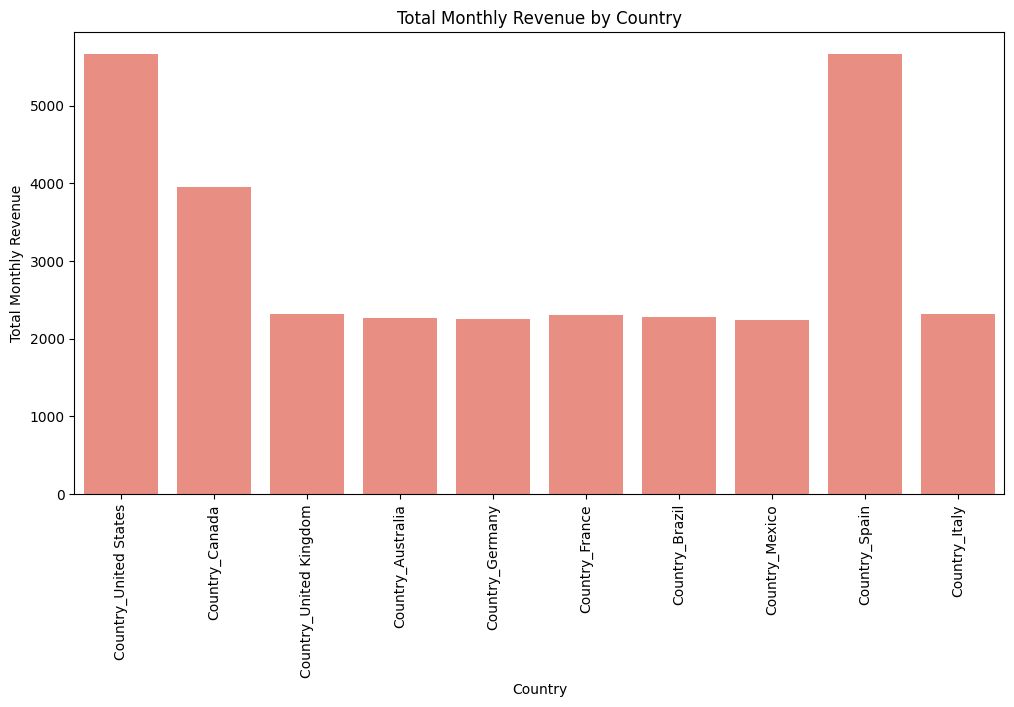

In [ ]:
# Visualizing the "Total Monthly Revenue by Country"
plt.figure(figsize=(12, 6))
country_cols = ['Country_Australia', 'Country_Brazil', 'Country_Canada', 'Country_France', 'Country_Germany',
                'Country_Italy', 'Country_Mexico', 'Country_Spain', 'Country_United Kingdom', 'Country_United States']
df['Country'] = df[country_cols].idxmax(axis=1)
sns.barplot(data=df, x='Country', y='Monthly Revenue', estimator=sum, errorbar=None, color="salmon")
plt.title('Total Monthly Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Monthly Revenue')
plt.xticks(rotation=90)
plt.show()

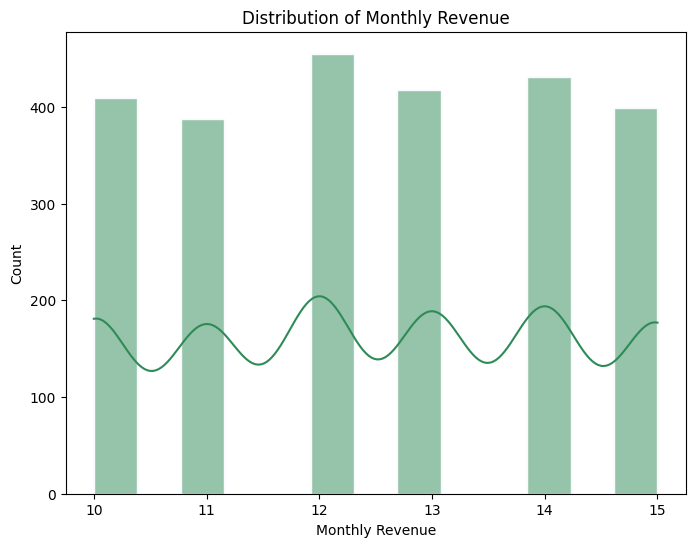

In [ ]:
# Visualizing the "Distribution of Monthly Revenue"
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Monthly Revenue', kde=True, color='seagreen', edgecolor="ghostwhite")
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Count')
plt.show()

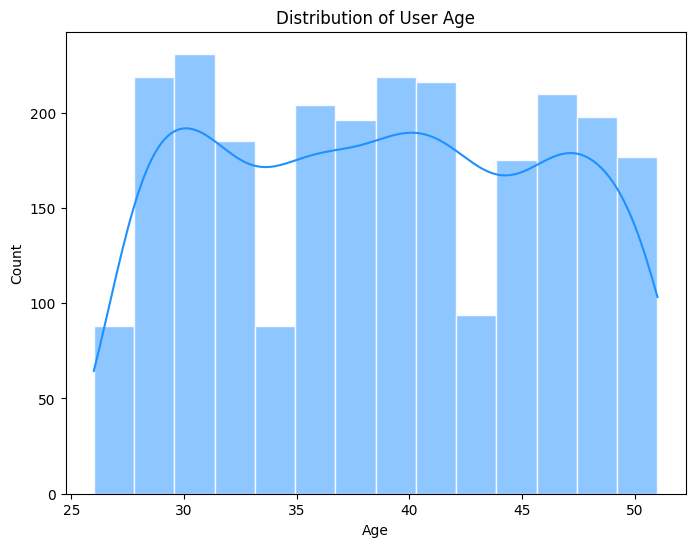

In [ ]:
# Visualizing the "Distribution of Age"
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True, color='dodgerblue', edgecolor="ghostwhite")
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

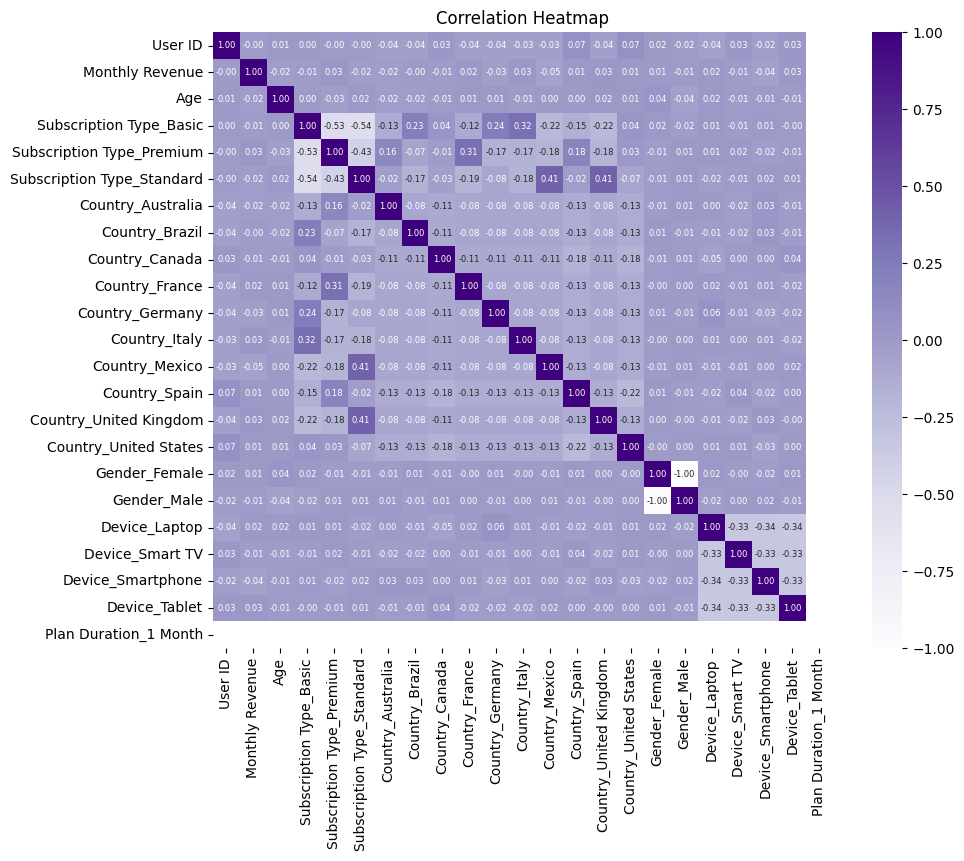

In [ ]:
# Visualizing the "Correlation Heatmap"
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="Purples", annot_kws={"fontsize": 6}, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Part 3: Linear Regression Model (Predicting Monthly Revenue)

### Build the Model

Develop a linear regression model to predict the Monthly Revenue based on selected features.

In [ ]:
# Defining features (X) and target variable (y)
linear_X = df[linear_features]
linear_y = df['Monthly Revenue']

# Splitting the data into training and testing sets
linear_X_train, linear_X_test, linear_y_train, linear_y_test = train_test_split(linear_X, linear_y, test_size=0.2, random_state=42)

In [ ]:
# Initializing the linear regression model
linear_model = LinearRegression()

# Fitting the model to the training data
linear_model.fit(linear_X_train, linear_y_train)

LinearRegression()

In [ ]:
# Making predictions using the test data
linear_y_pred = linear_model.predict(linear_X_test)

### Model Evaluation

Evaluate the model using R-squared, RMSE, or other relevant metrics.

In [ ]:
# Calculating R-squared of the Linear Regression model
print(f"R-squared (R²): {r2_score(linear_y_test, linear_y_pred):.4f}")

# Calculating RMSE of the Linear Regression model
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(linear_y_test, linear_y_pred)):.4f}")

# Calculating Mean Absolute Error (MAE) of the Linear Regression model
print(f"Mean Absolute Error (MAE): {mean_absolute_error(linear_y_test, linear_y_pred):.4f}")

# Calculating Mean Squared Logarithmic Error (MSLE) of the Linear Regression model
print(f"Mean Squared Logarithmic Error (MSLE): {mean_squared_log_error(linear_y_test, linear_y_pred):.4f}")

# Calculating Explained Variance Score of the Linear Regression model
print(f"Explained Variance Score: {explained_variance_score(linear_y_test, linear_y_pred):.4f}")

R-squared (R²): -0.0139
Root Mean Squared Error (RMSE): 1.6735
Mean Absolute Error (MAE): 1.4557
Mean Squared Logarithmic Error (MSLE): 0.0160
Explained Variance Score: -0.0113


Based on the evaluation metrics generated, it is evident that the Linear Regression model is performing poorly in predicting the Monthly Revenue, to be quite honest, and that Linear Regression model might be the suitable one for this.

1. **R-squared (R²)**: This metric represents the proportion of the variance in the target variable (Monthly Revenue) that is explained by the independent variables (features) in the model. A value of -0.0139 indicates that the model is not able to explain any of the variance in the Monthly Revenue, and it is performing worse than a simple baseline model that predicts the mean value of the target variable.

2. **Root Mean Squared Error (RMSE)**: This metric measures the average magnitude of the errors in the same units as the target variable. An RMSE of 1.6735 means that, on average, the model's predictions are off by approximately 1.6735 units from the actual Monthly Revenue values.

3. **Mean Absolute Error (MAE)**: This metric represents the average absolute difference between the predicted and actual Monthly Revenue values. A MAE of 1.4557 means that, on average, the model's predictions differ from the actual values by 1.4557 units, regardless of the direction.

4. **Mean Squared Logarithmic Error (MSLE)**: This metric is calculated using the logarithm of the actual and predicted values.

5. **Explained Variance Score**: This metric represents the proportion of the variance in the target variable that is explained by the model's predictions. A value of -0.0113 indicates that the model's predictions are not able to explain any of the variance in the Monthly Revenue, and it is performing worse than a simple baseline model that predicts the mean value of the target variable.

## Part 4: Logistic Regression Model (Predicting Customer Feedback)

### Model Building

Assuming a binary feedback variable (positive/negative), construct a logistic regression model to predict feedback based on user demographics and subscription details.

In [ ]:
# Creating a binary feedback column with random 0s and 1s since it is non-existent in the dataset
np.random.seed(42)
df['Customer Feedback'] = np.random.randint(0, 2, size=len(df))

# Displaying the first few rows of the dataset with the new column
df.head()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Country_Australia,Country_Brazil,...,Country_United States,Gender_Female,Gender_Male,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet,Plan Duration_1 Month,Country,Customer Feedback
0,1,10,15-01-22,10-06-23,28,1,0,0,0,0,...,1,0,1,0,0,1,0,1,Country_United States,0
1,2,15,05-09-21,22-06-23,35,0,1,0,0,0,...,0,1,0,0,0,0,1,1,Country_Canada,1
2,3,12,28-02-23,27-06-23,42,0,0,1,0,0,...,0,0,1,0,1,0,0,1,Country_United Kingdom,0
3,4,12,10-07-22,26-06-23,51,0,0,1,1,0,...,0,1,0,1,0,0,0,1,Country_Australia,0
4,5,10,01-05-23,28-06-23,33,1,0,0,0,0,...,0,0,1,0,0,1,0,1,Country_Germany,0


In [ ]:
# Defining features (X) and target variable (y)
logistic_X = df[logistic_features]
logistic_y = df['Customer Feedback']

# Splitting the data into training and testing sets
logistic_X_train, logistic_X_test, logistic_y_train, logistic_y_test = train_test_split(logistic_X, logistic_y, test_size=0.2, random_state=42)

In [ ]:
# Initializing the logistic regression model
logistic_model = LogisticRegression()

# Fitting the model to the training data
logistic_model.fit(logistic_X_train, logistic_y_train)

LogisticRegression()

In [ ]:
# Making predictions using the test data
logistic_y_pred = logistic_model.predict(logistic_X_test)

### Evaluation

Use accuracy, precision, recall, F1-score, and the confusion matrix for model assessment.

In [ ]:
# Calculating accuracy of the Logistic Regression model
print(f"Accuracy: {accuracy_score(logistic_y_test, logistic_y_pred):.4f}")

# Calculating precision of the Logistic Regression model
print(f"Precision: {precision_score(logistic_y_test, logistic_y_pred):.4f}")

# Calculating recall of the Logistic Regression model
print(f"Recall: {recall_score(logistic_y_test, logistic_y_pred):.4f}")

# Calculating F1-score of the Logistic Regression model
print(f"F1-score: {f1_score(logistic_y_test, logistic_y_pred):.4f}")

# Calculating confusion matrix of the Logistic Regression model
print("Confusion Matrix:\n", confusion_matrix(logistic_y_test, logistic_y_pred))

Accuracy: 0.4960
Precision: 0.4951
Recall: 0.4040
F1-score: 0.4449
Confusion Matrix:
 [[147 103]
 [149 101]]


Based on the evaluation metrics provided, it appears that the Logistic Regression model is also performing poorly in predicting customer feedback, to be quite honest.

1. **Accuracy:** The accuracy of the model is 49.60%, which means that the model correctly predicts the customer feedback (positive or negative) in only about 49.6% of the cases.

2. **Precision:** Precision measures the proportion of positive predictions that are actually correct. In this case, the precision is 0.4951, which means that when the model predicts positive feedback, it is correct only about 49.51% of the time.

3. **Recall:** Recall measures the proportion of actual positive instances that are correctly identified by the model. A recall of 0.4040 indicates that the model correctly identifies only about 40.40% of the actual positive feedback cases.

4. **F1-score:** The F1-score is the mean of precision and recall, and it provides a balanced measure of the model's performance. In this case, the F1-score of 0.4449 suggests that the model's overall performance in predicting positive feedback is relatively poor.

5. **Confusion Matrix:** The confusion matrix provides a more detailed breakdown of the model's predictions. The rows represent the actual classes, and the columns represent the predicted classes.

    - The top-left cell (147) represents the number of true negatives (negative feedback correctly predicted as negative).
    - The top-right cell (103) represents the number of false positives (negative feedback incorrectly predicted as positive).
    - The bottom-left cell (149) represents the number of false negatives (positive feedback incorrectly predicted as negative).
    - The bottom-right cell (101) represents the number of true positives (positive feedback correctly predicted as positive).
  
  The confusion matrix further confirms the poor performance of the model, as it shows a significant number of misclassifications in both the positive and negative feedback cases.

## Part 5: Comparative Analysis and Visualization

### Feature Importance

Examine the significance of different features in both regression models.

In [ ]:
# Getting the coefficients of the Linear Regression model
linear_coefficients = linear_model.coef_

# Zipping the feature names and coefficients together of the Linear Regression model
linear_feature_importance = sorted(zip(linear_X_train.columns, linear_coefficients), key=lambda x: abs(x[1]), reverse=True)

# Creating a DataFrame for feature importances of the Linear Regression model
linear_feature_importance_df = pd.DataFrame(linear_feature_importance, columns=['Feature', 'Importance'])

# Sorting the DataFrame by Importance in descending order
linear_feature_importance_df = linear_feature_importance_df.sort_values(by='Importance', ascending=False)

# Printing the feature importance of the Linear Regression model
print("Linear Regression Feature Importance:")
for linear_feature, coef in linear_feature_importance:
    print(f"{linear_feature}: {coef:.4f}")

Linear Regression Feature Importance:
Country_Australia: -0.1460
Device_Laptop: 0.1355
Device_Smartphone: -0.1078
Subscription Type_Premium: 0.1007
Device_Smart TV: -0.0873
Country_United Kingdom: 0.0701
Subscription Type_Standard: -0.0699
Device_Tablet: 0.0597
Country_United States: 0.0573
Country_Spain: 0.0541
Subscription Type_Basic: -0.0307
Country_Brazil: 0.0213
Age: -0.0086
Gender_Female: -0.0002
Gender_Male: 0.0002
Plan Duration_1 Month: 0.0000


In [ ]:
# Getting the coefficients of the Logistic Regression model
logistic_coefficients = logistic_model.coef_[0]

# Zipping the feature names and coefficients together of the Logistic Regression model
logistic_feature_importance = sorted(zip(logistic_X_train.columns, logistic_coefficients), key=lambda x: abs(x[1]), reverse=True)

# Creating a DataFrame for feature importances of the Logistic Regression model
logistic_feature_importance_df = pd.DataFrame(logistic_feature_importance, columns=['Feature', 'Importance'])

# Sorting the DataFrame by Importance in descending order
logistic_feature_importance_df = logistic_feature_importance_df.sort_values(by='Importance', ascending=False)

# Printing the feature importance of the Linear Regression model
print("Logistic Regression Feature Importance:")
for logistic_feature, coef in logistic_feature_importance:
    print(f"{logistic_feature}: {coef:.4f}")

Logistic Regression Feature Importance:
Country_United Kingdom: -0.2153
Subscription Type_Standard: 0.1446
Gender_Female: 0.1300
Country_Spain: -0.1079
Device_Smart TV: 0.0982
Country_United States: -0.0833
Device_Tablet: -0.0813
Country_Brazil: 0.0767
Gender_Male: -0.0746
Subscription Type_Premium: -0.0679
Country_Australia: 0.0661
Plan Duration_1 Month: 0.0554
Device_Smartphone: 0.0329
Subscription Type_Basic: -0.0213
Device_Laptop: 0.0055
Age: -0.0047


### Insights

Draw insights from the models' predictions, focusing on how various factors might influence Monthly Revenue and feedback.

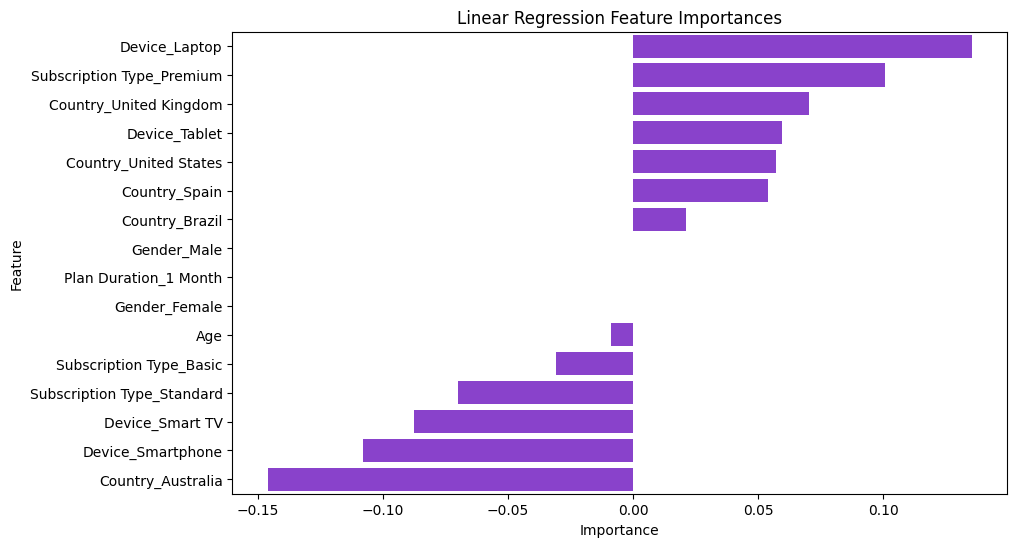

In [ ]:
# Visualizing feature importances of the Linear Regression model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=linear_feature_importance_df, color='blueviolet')
plt.title('Linear Regression Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<u>**Factors Influencing Monthly Revenue (Linear Regression Model)**</u>

1. **Device Type**: The feature importances suggest that the type of device used by the customer has a significant impact on their monthly revenue. Specifically, using a laptop or tablet is associated with higher monthly revenue, while using a smartphone or smart TV is associated with lower monthly revenue.

2. **Subscription Type**: The type of subscription plan also plays a role in determining monthly revenue. Customers with a premium subscription tend to generate higher monthly revenue compared to those with a basic or standard subscription.

3. **Country**: The country where the customer is located seems to influence their monthly revenue. Customers from the United Kingdom and the United States tend to have higher monthly revenue, while customers from Australia tend to have lower monthly revenue.

4. **Age**: The age of the customer has a slight negative impact on monthly revenue which suggests that younger customers may generate slightly higher revenue than older customers.

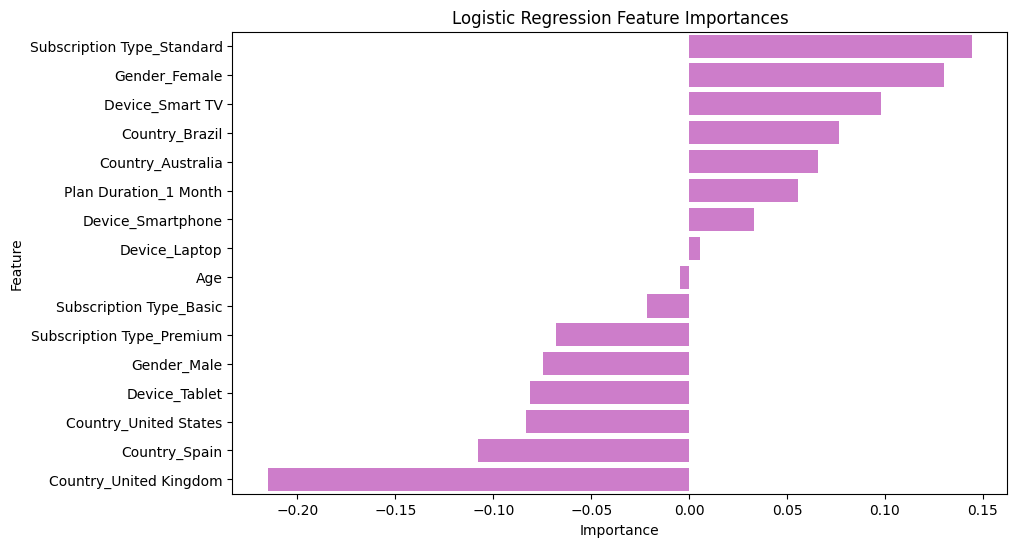

In [ ]:
# Visualizing feature importances of the Logistic Regression model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=logistic_feature_importance_df, color='orchid')
plt.title('Logistic Regression Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<u>**Factors Influencing Customer Feedback (Logistic Regression)**</u>

1. **Country**: The country where the customer is located appears to be the most influential factor in determining customer feedback. Customers from the United Kingdom are more likely to provide negative feedback, while those from Brazil and Australia are more inclined to give positive feedback.

2. **Subscription Type**: The type of subscription plan also impacts customer feedback. Customers with a standard subscription are more likely to provide positive feedback, while those with a premium subscription are more likely to give negative feedback.

3. **Gender**: Gender seems to play a role in customer feedback, with female customers being more inclined to provide positive feedback compared to male customers.

4. **Device Type**: The type of device used by the customer also influences their feedback. Customers using smart TVs are more likely to provide positive feedback, while those using tablets are more likely to give negative feedback.

5. **Plan Duration**: Customers with a one-month plan duration tend to provide slightly more positive feedback.